Dataset Shape: (100, 8)
   EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           HR   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   28    Marketing   65000               5   
4           5  David Johnson   50        Sales   75000              20   

   PerformanceScore Attrition  
0                80        No  
1                85        No  
2                95       Yes  
3                78        No  
4                88       Yes  
       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.0000

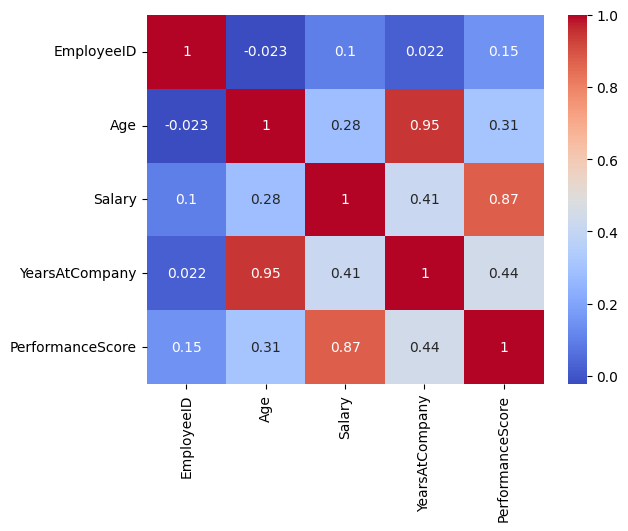

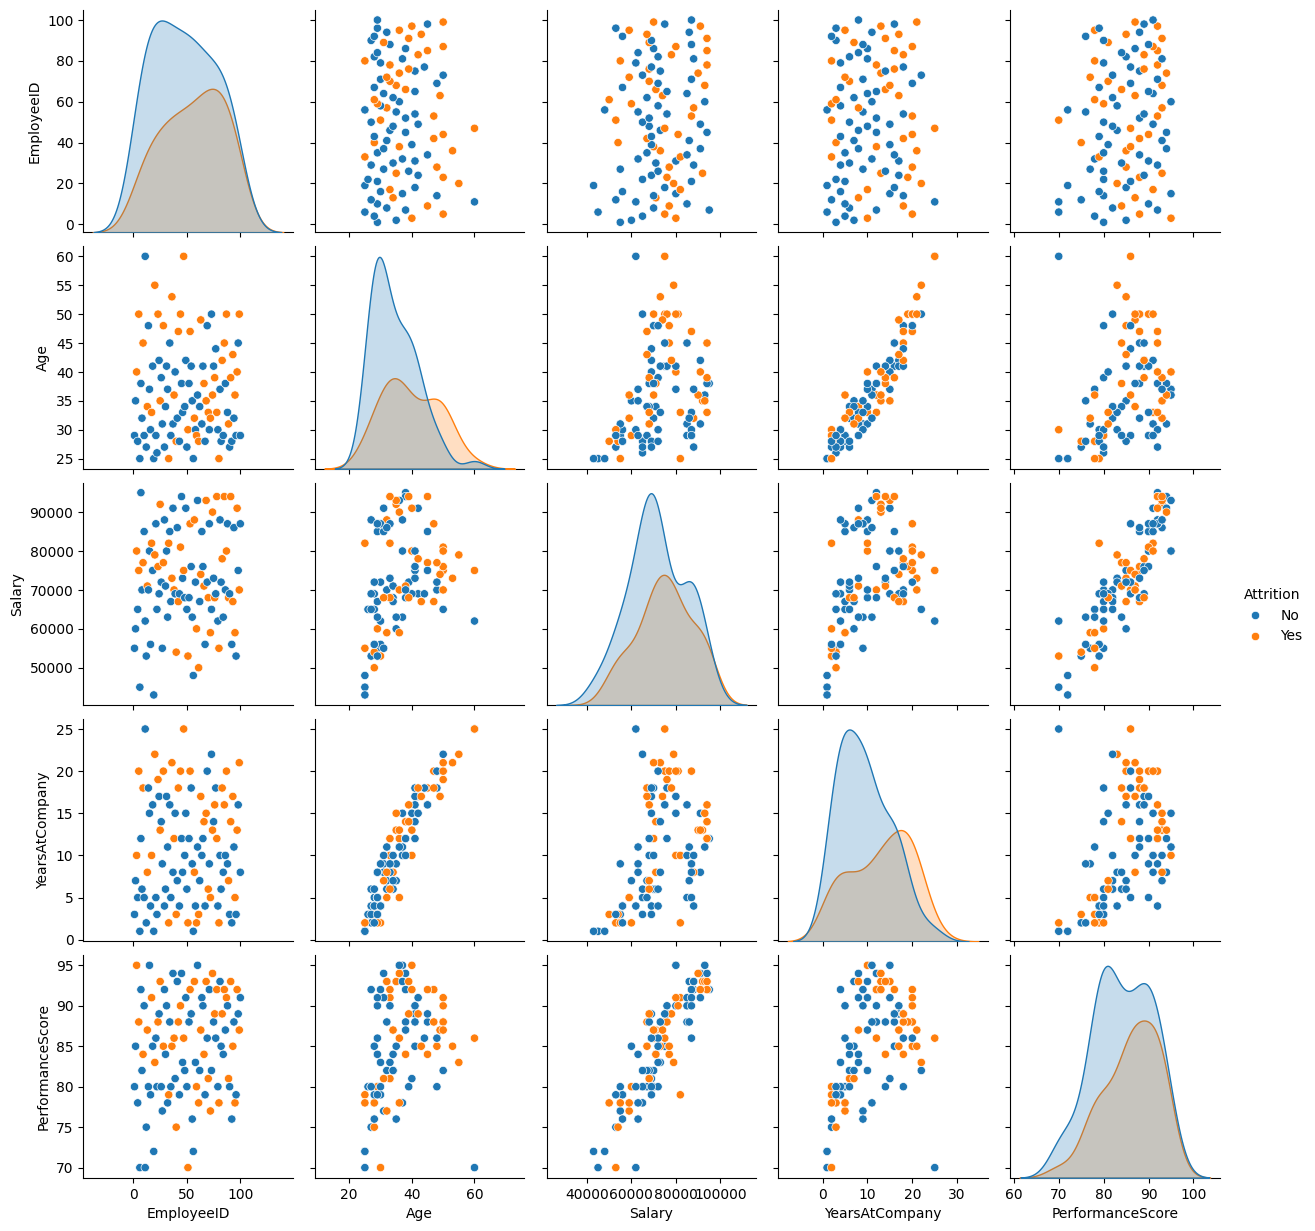

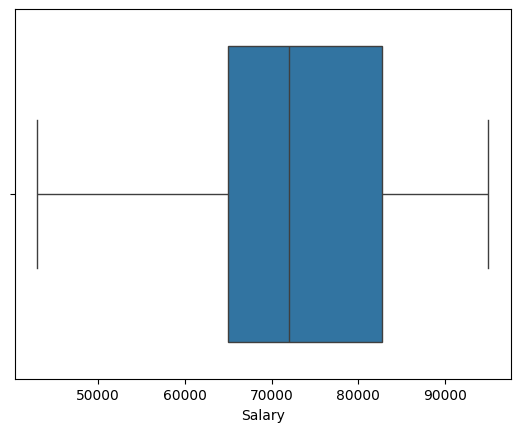

Attrition Prediction (Logistic Regression):
Accuracy: 0.6
Precision: 0.42857142857142855
Recall: 0.42857142857142855
F1: 0.42857142857142855


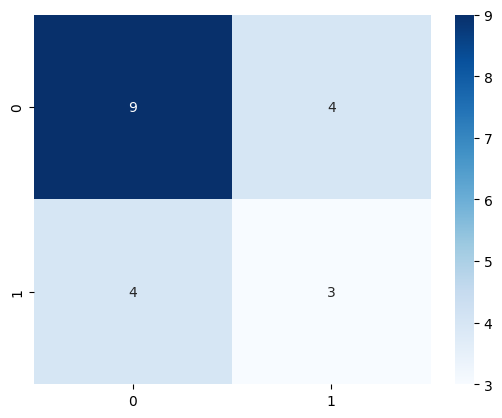

Performance Prediction (Linear Regression):
R²: 0.7506208881099902
MSE: 0.3189991445396855


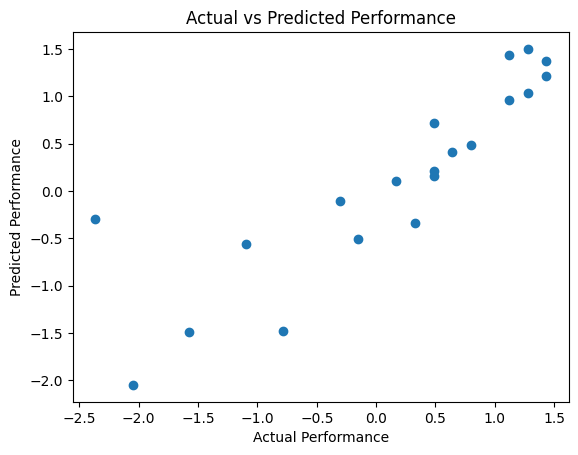

Epoch [10/50], Loss: 0.7957
Epoch [20/50], Loss: 1.3645
Epoch [30/50], Loss: 0.9039
Epoch [40/50], Loss: 0.6788
Epoch [50/50], Loss: 0.5269
PyTorch Performance Prediction - MSE: 0.9333946108818054 R²: 0.30679855872120365
Epoch [10/50], Loss: 0.7560
Epoch [20/50], Loss: 0.7921
Epoch [30/50], Loss: 0.6767
Epoch [40/50], Loss: 0.6428
Epoch [50/50], Loss: 0.6216
PyTorch Attrition Prediction:
Accuracy: 0.45 Precision: 0.3 Recall: 0.42857142857142855 F1: 0.35294117647058826

--- Insights ---
Performance correlated with years at company.
Lower performance + lower salary = higher attrition risk.
Certain departments show higher attrition trends.


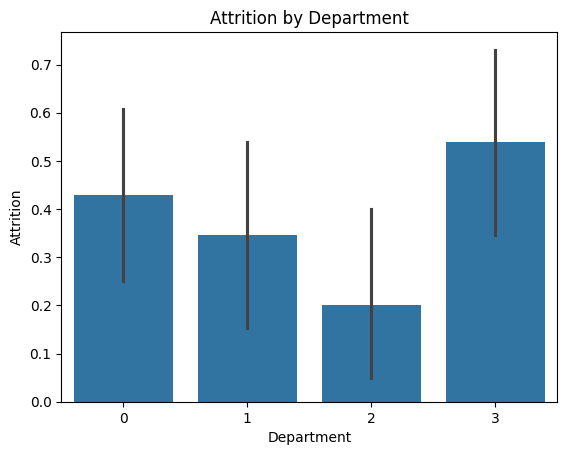

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score, mean_squared_error
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
df = pd.read_csv("Employee_data.csv")
df.head()
df.drop_duplicates(inplace=True)
df.ffill(inplace=True)
print("Dataset Shape:", df.shape)
print(df.head())
print(df.describe())
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()
sns.pairplot(df, hue="Attrition")
plt.show()
sns.boxplot(x=df["Salary"])
plt.show()
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
if "Department" in df.columns:
    df["Department"] = le.fit_transform(df["Department"])
scaler = StandardScaler()
df[["Salary", "PerformanceScore"]] = scaler.fit_transform(df[["Salary", "PerformanceScore"]])
X = df.drop(["Employee ID", "Name", "Attrition"], axis=1, errors="ignore")
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Attrition Prediction (Logistic Regression):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()
X_perf = df.drop(["Employee ID", "Name", "PerformanceScore"], axis=1, errors="ignore")
y_perf = df["PerformanceScore"]
Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_perf, y_perf, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(Xp_train, yp_train)
yp_pred = lin_reg.predict(Xp_test)
print("Performance Prediction (Linear Regression):")
print("R²:", r2_score(yp_test, yp_pred))
print("MSE:", mean_squared_error(yp_test, yp_pred))
plt.scatter(yp_test, yp_pred)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs Predicted Performance")
plt.show()
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
Xp_train_t = torch.tensor(Xp_train.values, dtype=torch.float32)
yp_train_t = torch.tensor(yp_train.values, dtype=torch.float32).view(-1, 1)
Xp_test_t = torch.tensor(Xp_test.values, dtype=torch.float32)
yp_test_t = torch.tensor(yp_test.values, dtype=torch.float32).view(-1, 1)
class PerformanceNN(nn.Module):
    def __init__(self, input_dim):
        super(PerformanceNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)
perf_model = PerformanceNN(Xp_train_t.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(perf_model.parameters(), lr=0.01)
for epoch in range(50):
    optimizer.zero_grad()
    outputs = perf_model(Xp_train_t)
    loss = criterion(outputs, yp_train_t)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/50], Loss: {loss.item():.4f}")
with torch.no_grad():
    y_pred_perf = perf_model(Xp_test_t)
    mse = criterion(y_pred_perf, yp_test_t).item()
    r2 = 1 - mse / torch.var(yp_test_t).item()
    print("PyTorch Performance Prediction - MSE:", mse, "R²:", r2)
class AttritionNN(nn.Module):
    def __init__(self, input_dim):
        super(AttritionNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))
attr_model = AttritionNN(X_train_t.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(attr_model.parameters(), lr=0.01)
for epoch in range(50):
    optimizer.zero_grad()
    outputs = attr_model(X_train_t)
    loss = criterion(outputs, y_train_t)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/50], Loss: {loss.item():.4f}")
with torch.no_grad():
    y_pred_attr = attr_model(X_test_t)
    y_pred_attr_cls = (y_pred_attr >= 0.5).float()
    acc = accuracy_score(y_test, y_pred_attr_cls.numpy())
    prec = precision_score(y_test, y_pred_attr_cls.numpy())
    rec = recall_score(y_test, y_pred_attr_cls.numpy())
    f1 = f1_score(y_test, y_pred_attr_cls.numpy())
    print("PyTorch Attrition Prediction:")
    print("Accuracy:", acc, "Precision:", prec, "Recall:", rec, "F1:", f1)
print("\n--- Insights ---")
print("Performance correlated with years at company.")
print("Lower performance + lower salary = higher attrition risk.")
print("Certain departments show higher attrition trends.")
sns.barplot(x="Department", y="Attrition", data=df)
plt.title("Attrition by Department")
plt.show()


In [ ]:
#date of submission
22/09/2025